# transfer Learning

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.preprocessing.image import ImageDataGenerator, load_img

Using TensorFlow backend.


In [2]:
train_dir = './clean-dataset/train'
validation_dir = './clean-dataset/validation'
image_size = 224

## Experiment 1: Freezing all layers - Same as Transfer Learning
Create the model

In [4]:
from keras.applications import VGG16

#Load the VGG model
vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))

# Freeze all the layers
for layer in vgg_conv.layers[:]:
    layer.trainable = False

# Check the trainable status of the individual layers
for layer in vgg_conv.layers:
    print(layer, layer.trainable)


from keras import models
from keras import layers
from keras import optimizers

# Create the model
model = models.Sequential()

# Add the vgg convolutional base model
model.add(vgg_conv)

# Add new layers
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(3, activation='softmax'))

# Show a summary of the model. Check the number of trainable parameters
model.summary()

<keras.engine.input_layer.InputLayer object at 0x000002414FFD4148> False
<keras.layers.convolutional.Conv2D object at 0x000002414FFD4408> False
<keras.layers.convolutional.Conv2D object at 0x000002414FFD4D08> False
<keras.layers.pooling.MaxPooling2D object at 0x000002414FFDC8C8> False
<keras.layers.convolutional.Conv2D object at 0x000002414FFE29C8> False
<keras.layers.convolutional.Conv2D object at 0x000002414FFE78C8> False
<keras.layers.pooling.MaxPooling2D object at 0x000002414FFF59C8> False
<keras.layers.convolutional.Conv2D object at 0x000002414FFFED88> False
<keras.layers.convolutional.Conv2D object at 0x00000241500019C8> False
<keras.layers.convolutional.Conv2D object at 0x000002415000FA88> False
<keras.layers.pooling.MaxPooling2D object at 0x000002415001E6C8> False
<keras.layers.convolutional.Conv2D object at 0x00000241500286C8> False
<keras.layers.convolutional.Conv2D object at 0x000002415002D6C8> False
<keras.layers.convolutional.Conv2D object at 0x000002415003A808> False
<ker

## Experiment 1
Train the model

In [5]:
# No Data augmentation 
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

# Change the batchsize according to your system RAM
train_batchsize = 100
val_batchsize = 10

# Data Generator for Training data
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(image_size, image_size),
        batch_size=train_batchsize,
        class_mode='categorical')

# Data Generator for Validation data
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(image_size, image_size),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

Found 600 images belonging to 3 classes.
Found 150 images belonging to 3 classes.


In [6]:
# Train the Model
history = model.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size ,
      epochs=5,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1)


Epoch 1/5
6/6 [==============================] - 56s 9s/step - loss: 13.2961 - accuracy: 0.4200 - val_loss: 0.5987 - val_accuracy: 0.5667
Epoch 2/5
6/6 [==============================] - 58s 10s/step - loss: 2.7102 - accuracy: 0.6017 - val_loss: 3.4308 - val_accuracy: 0.5800
Epoch 3/5
6/6 [==============================] - 58s 10s/step - loss: 1.1203 - accuracy: 0.7217 - val_loss: 0.0729 - val_accuracy: 0.8200
Epoch 4/5
6/6 [==============================] - 58s 10s/step - loss: 0.4439 - accuracy: 0.8550 - val_loss: 0.1142 - val_accuracy: 0.8800
Epoch 5/5
6/6 [==============================] - 56s 9s/step - loss: 0.2750 - accuracy: 0.9000 - val_loss: 0.0800 - val_accuracy: 0.8867


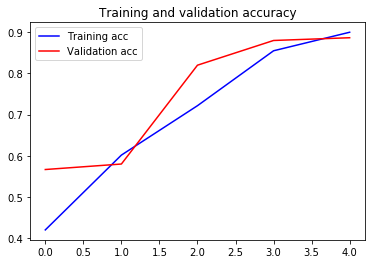

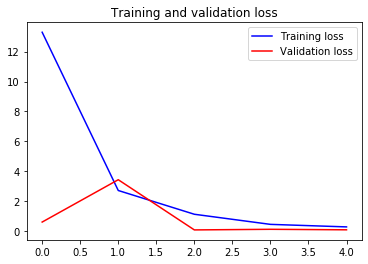

In [7]:
# Save the Model
model.save('all_freezed.h5')

# Plot the accuracy and loss curves
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

> keras augmentation
- 동적으로 데이터를 만들면서 훈련할 때 사용
- VGG16을 사용할 때는 classification layer에만 사용
